In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution

In [2]:
df = pd.read_csv('E_p_t0 data.csv')

In [3]:
x = np.array(df.iloc[49:,1], dtype=float)
y = np.array(df.iloc[49:,2], dtype=float)

In [4]:
def fn(x, m, k, C):
    return -m * x ** (-k) + C

def loss(parameters):
    y_pred = fn(x, *parameters)
    return np.sum((y_pred - y) ** 2)

def generate_initial_parameters():
    parameterBounds = []
    parameterBounds.append([0, 200]) # search bounds for m
    parameterBounds.append([0, 4]) # search bounds for k
    parameterBounds.append([-100, 100]) # search bounds for C

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(loss, parameterBounds, seed=3)
    return result.x

In [5]:
# generate initial parameter values
geneticParameters = generate_initial_parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(fn, x, y, geneticParameters, bounds=((0, 0, -np.inf), (np.inf, np.inf, np.inf)))

print("m = {}, k = {}, C = {}".format(*fittedParameters))

modelPredictions = fn(x, *fittedParameters) 

absError = modelPredictions - y

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

m = 342.1121676874358, k = 0.4519671034535056, C = 202.81138958706026
RMSE: 1.5317151153561752
R-squared: 0.9852242581880267


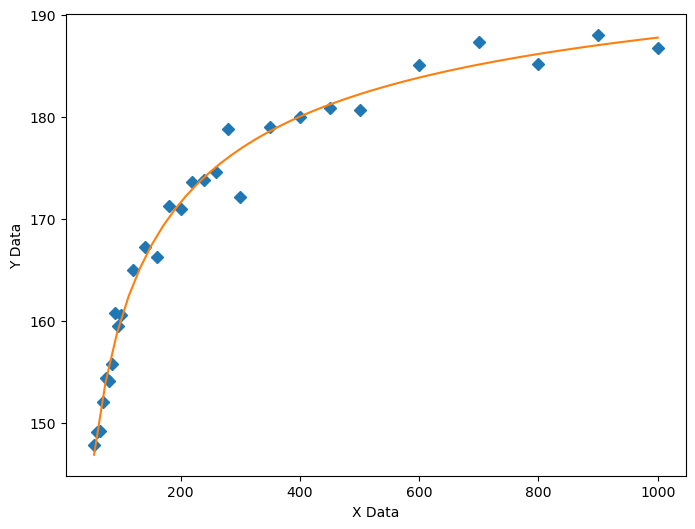

In [6]:
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(x, y,  'D')

    # create data for the fitted equation plot
    xModel = np.linspace(min(x), max(x))
    yModel = fn(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [7]:
export_df = pd.DataFrame({'Coefficient': ['m', 'k', 'C'],
                          'Values': fittedParameters})

export_df.to_csv('fitted parameters.csv', index=False)